# Step 1: Training the Model with Data Augmentation

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms, models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Define data paths
DatasetPath = 'ecgdataset'

# Define transformations for training and validation
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizing as per ImageNet statistics
])

In [3]:
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizing as per ImageNet statistics
])

In [4]:
# Load dataset
dataset = datasets.ImageFolder(root=DatasetPath)

# Split dataset
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_transform

train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=20, shuffle=False)

# Load pre-trained AlexNet
model = models.alexnet(pretrained=True)
num_features = model.classifier[6].in_features

# Modify the classifier
model.classifier[6] = nn.Linear(num_features, 3)  # Assuming 3 classes

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)

c:\Users\Harsh\OneDrive\Desktop\Sleep Pattern Recog\cnn\env1\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Harsh\OneDrive\Desktop\Sleep Pattern Recog\cnn\env1\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
# Training the model
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [],[]

for epoch in range(10):  # Number of epochs
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    
    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(correct / total)

    print(f'Epoch {epoch+1}/{10}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, '
          f'Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}')


Epoch 1/8, Train Loss: 0.9100, Train Acc: 0.5583, Val Loss: 0.6665, Val Acc: 0.6944
Epoch 2/8, Train Loss: 0.6145, Train Acc: 0.7333, Val Loss: 0.5584, Val Acc: 0.7444
Epoch 3/8, Train Loss: 0.5118, Train Acc: 0.8056, Val Loss: 0.5075, Val Acc: 0.7722
Epoch 4/8, Train Loss: 0.4145, Train Acc: 0.8361, Val Loss: 0.4187, Val Acc: 0.8222
Epoch 5/8, Train Loss: 0.3411, Train Acc: 0.8667, Val Loss: 0.3588, Val Acc: 0.8667
Epoch 6/8, Train Loss: 0.2829, Train Acc: 0.8944, Val Loss: 0.3074, Val Acc: 0.8944
Epoch 7/8, Train Loss: 0.2384, Train Acc: 0.9125, Val Loss: 0.2699, Val Acc: 0.8944
Epoch 8/8, Train Loss: 0.1886, Train Acc: 0.9278, Val Loss: 0.2860, Val Acc: 0.8889
Epoch 9/8, Train Loss: 0.1736, Train Acc: 0.9417, Val Loss: 0.2159, Val Acc: 0.9111
Epoch 10/8, Train Loss: 0.1541, Train Acc: 0.9403, Val Loss: 0.2300, Val Acc: 0.9111


In [7]:
# Save the model
torch.save(model.state_dict(), 'trained_alexnet5.pth')

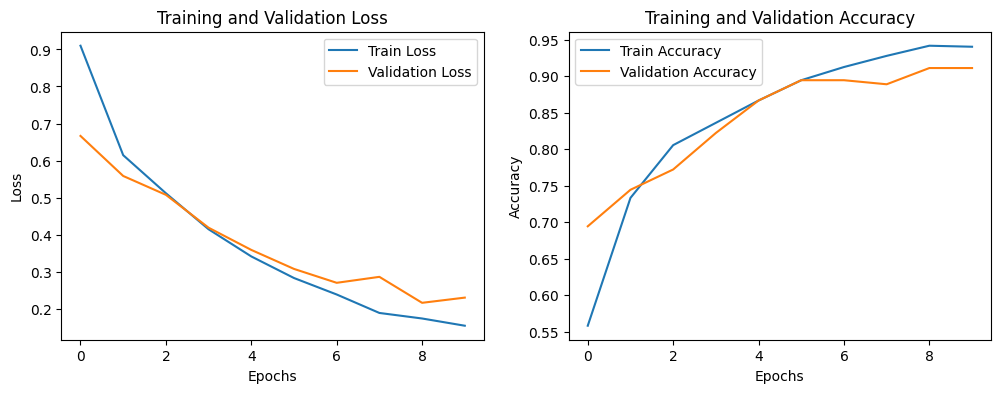

In [9]:

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [10]:
# import torch
# import torchvision
# from torchvision import datasets, transforms, models
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Define data paths
# DatasetPath = 'ecgdataset'

# # Define transformations for training and validation
# train_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(10),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizing as per ImageNet statistics
# ])

# val_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizing as per ImageNet statistics
# ])

# # Load dataset
# dataset = datasets.ImageFolder(root=DatasetPath)

# # Split dataset
# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# train_dataset.dataset.transform = train_transform
# val_dataset.dataset.transform = val_transform

# train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=20, shuffle=False)

# # Load pre-trained AlexNet
# model = models.alexnet(pretrained=True)
# num_features = model.classifier[6].in_features

# # Modify the classifier
# model.classifier[6] = nn.Linear(num_features, 3)  # Assuming 3 classes

# # Define loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)

# # Training the model
# train_losses, val_losses = [], []
# train_accuracies, val_accuracies = [],[]

# for epoch in range(8):  # Number of epochs
#     model.train()
#     running_loss, correct, total = 0.0, 0, 0
#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
    
#     train_losses.append(running_loss / len(train_loader))
#     train_accuracies.append(correct / total)
    
#     # Validation
#     model.eval()
#     val_loss, correct, total = 0.0, 0, 0
#     with torch.no_grad():
#         for inputs, labels in val_loader:
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             val_loss += loss.item()
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     val_losses.append(val_loss / len(val_loader))
#     val_accuracies.append(correct / total)

#     print(f'Epoch {epoch+1}/{8}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, '
#           f'Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}')

# # Save the model
# torch.save(model.state_dict(), 'trained_alexnet.pth')

# # Plot accuracy and loss curves
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(train_losses, label='Train Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()

# # Plotting training and validation accuracy
# plt.subplot(1, 2, 2)
# plt.plot(train_accuracies, label='Train Accuracy')
# plt.plot(val_accuracies, label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()
# plt.show()


# Step 2: Evaluate the Model with Confusion Matrix

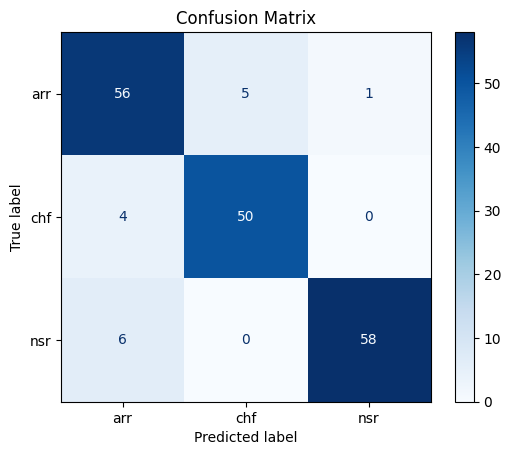

In [11]:
# Evaluate the model
model.eval()
all_labels = []
all_preds = []
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_preds.extend(predicted.numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Import necessary library
from sklearn.metrics import classification_report

# Inside the training loop
# Validation
model.eval()
val_loss, correct, total = 0.0, 0, 0
all_true = []
all_pred = []
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_true.extend(labels.cpu().numpy())
        all_pred.extend(predicted.cpu().numpy())

val_losses.append(val_loss / len(val_loader))
val_accuracies.append(correct / total)

# Generate classification report
report = classification_report(all_true, all_pred)
print(report)


              precision    recall  f1-score   support

           0       0.85      0.90      0.88        62
           1       0.91      0.93      0.92        54
           2       0.98      0.91      0.94        64

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180



# Step 3: Classify a User-Provided Image

In [12]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt

In [20]:
# Load the saved model
model = models.alexnet(pretrained=False)
num_features = model.classifier[6].in_features
model.classifier[6] = torch.nn.Linear(num_features, 3)  # Assuming 3 classes
model.load_state_dict(torch.load('trained_alexnet5.pth', map_location=torch.device('cpu')))
model.eval()

c:\Users\Harsh\OneDrive\Desktop\Sleep Pattern Recog\cnn\env1\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Harsh\OneDrive\Desktop\Sleep Pattern Recog\cnn\env1\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [14]:

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [15]:
# Class labels
class_names = ['arr', 'nsr', 'chf']

def classify_image(image_path):
    # Load and transform the image
    try:
        image = Image.open(image_path).convert('RGB')
    except Exception as e:
        print(f"Error loading image: {e}")
        return

    image = transform(image).unsqueeze(0)  # Add batch dimension

    # Predict the class
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs.data, 1)
        class_label = class_names[predicted.item()]

    # Print and display the result
    print(f'The image is classified as: {class_label}')
    plt.imshow(Image.open(image_path))
    plt.title(f'Classified as: {class_label}')
    plt.axis('off')
    plt.show()

The image is classified as: arr


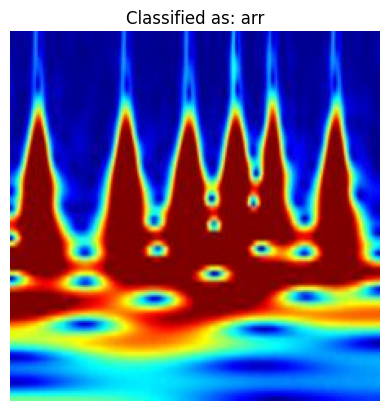

In [26]:
if __name__ == "__main__":
    # Prompt the user to enter the image path
    image_path = 'ecgdataset/arr/9507.jpg'

    # Correct the file path
    image_path = image_path.strip().replace("\\", "/")

    # Classify the provided image
    if image_path:
        classify_image(image_path)
    else:
        print("No file path provided.")

In [29]:
import scipy.io
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the MATLAB model
mat_data = scipy.io.loadmat('trained_alexnet.mat')

# Check the keys in the loaded data
print("Keys in loaded data:", mat_data.keys())

Keys in loaded data: dict_keys(['__header__', '__version__', '__globals__', 'None', '__function_workspace__'])


In [30]:
# Explore the contents of the loaded MATLAB data
for key in mat_data.keys():
    print(key, type(mat_data[key]))

__header__ <class 'bytes'>
__version__ <class 'str'>
__globals__ <class 'list'>
None <class 'scipy.io.matlab._mio5_params.MatlabOpaque'>
__function_workspace__ <class 'numpy.ndarray'>


In [32]:
netTransfer = mat_data['None']
netTransfer

MatlabOpaque([(b'netTransfer', b'MCOS', b'SeriesNetwork', array([[3707764736],
                     [         2],
                     [         1],
                     [         1],
                     [         1],
                     [        13]], dtype=uint32))                            ],
             dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')])

In [6]:
# import torch
# from torchvision import transforms, models
# from PIL import Image
# import matplotlib.pyplot as plt

# # Load the saved model
# model = models.alexnet(pretrained=False)
# num_features = model.classifier[6].in_features
# model.classifier[6] = torch.nn.Linear(num_features, 3)  # Assuming 3 classes
# model.load_state_dict(torch.load('trained_alexnet.pth', map_location=torch.device('cpu')))
# model.eval()

# # Define the image transformations
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Class labels
# class_names = ['arr', 'nsr', 'chf']

# def classify_image(image_path):
#     # Load and transform the image
#     try:
#         image = Image.open(image_path).convert('RGB')
#     except Exception as e:
#         print(f"Error loading image: {e}")
#         return

#     image = transform(image).unsqueeze(0)  # Add batch dimension

#     # Predict the class
#     with torch.no_grad():
#         outputs = model(image)
#         _, predicted = torch.max(outputs.data, 1)
#         class_label = class_names[predicted.item()]

#     # Print and display the result
#     print(f'The image is classified as: {class_label}')
#     plt.imshow(Image.open(image_path))
#     plt.title(f'Classified as: {class_label}')
#     plt.axis('off')
#     plt.show()

# if __name__ == "__main__":
#     # Prompt the user to enter the image path
#     image_path = input("Please enter the path to the image: ")

#     # Correct the file path
#     image_path = image_path.strip().replace("\\", "/")

#     # Classify the provided image
#     if image_path:
#         classify_image(image_path)
#     else:
#         print("No file path provided.")
